In [1]:
import sys
sys.path.append('/home/jra21/work/source/repos/opep')

In [2]:
from openep import io as openep_io
from openep import case as openep_case
from openep import mesh_routines as openep_mesh
from openep import case_routines as case_routines

import numpy as np
from scipy.interpolate import LinearNDInterpolator as linterp
from scipy.interpolate import NearestNDInterpolator as nearest
from sklearn.neighbors import NearestNeighbors
from matplotlib.cm import jet, rainbow, jet_r, seismic
import matplotlib.pyplot as plt

In [5]:
# # Usecase 039 - Creating a voltage map from electroanatomic mapping data

filename = '/home/jra21/work/source/repos/opep/examples/data/new_dataset_1.mat'
distanceThresh = 10


ep_case = openep_io.load_case(filename)
ep_case_mesh = ep_case.create_mesh()
pts = ep_case.nodes

print(ep_case.fields['bip'])

[2.34581     nan     nan ... 2.9123  2.15193 3.46668]


In [4]:
# # Load EGMSurfx and EGM voltage values
coords = ep_case.electric['egmX'].T
data = ep_case.electric['egm'].T


iVp = case_routines.getMappingPointsWithinWoI(ep_case)
# macthing the shape of ivp with data
iVp_data = np.repeat(iVp, repeats=data.shape[1], axis=1)
# macthing the shape of ivp with coords
iVp_coords = np.repeat(iVp, repeats=coords.shape[1],axis=1)

data[~iVp_data] = np.nan
coords[~iVp_coords] = np.nan


# For each mapping point, n, find the voltage amplitude
max_volt = np.amax(a=data,axis=1).reshape(len(data),1)
min_volt = np.amin(a=data,axis=1).reshape(len(data),1)


amplitude_volt = np.subtract(max_volt,min_volt)


In [5]:
# Remove any data with Nans
for indx in range(amplitude_volt.shape[1]):
    tempData = amplitude_volt[:,indx]
    tempCoords = coords
    iNaN = np.isnan(tempData)
    tempData=tempData[~iNaN]
    tempCoords=tempCoords[~iNaN]



    interp = case_routines.OpenEPDataInterpolator(method='rbf',distanceThreshold=distanceThresh,rbfConstant=1)
    VertexVoltageData = interp.interpolate(x0=tempCoords,d0=tempData,x1=pts)
    
    
#     Rbf - Scipy 
    d1_py = case_routines.rbf_scipy(x0=tempCoords,d0=tempData,x1=pts,rbfConstant=1)
    #print(c)

ep_case.fields['d1'] = VertexVoltageData


RBF Check
max|y - yi| = 2.1875723454911622e-10


In [6]:
    
# DRAW Map
openep_mesh.compute_field(mesh=ep_case_mesh,fieldname='d1',minval=0,maxval=1,color_map=jet_r)
ep_case_mesh.show()

### Matlab - d1

In [7]:
sys.path.append('/home/jra21/work/source/repos/openep-core')
filename = '/home/jra21/work/source/repos/openep-core/py_d1.mat'
mat_d1_file = openep_io.load_mat(filename)
mat_d1 = mat_d1_file['py_d1'].flatten()

mat_d1_NotNan = mat_d1[~np.isnan(mat_d1)]
print(mat_d1_NotNan.shape)

for item in mat_d1_NotNan:
    print(item)

(7019,)
3.232098503183469
3.9829743118190435
8.13170863415816
4.527522805245149
8.71201963533663
8.952106749767786
7.710112479442464
7.123692403033107
4.316114521551
7.30368916602816
3.009170711423772
3.6550392942245167
4.434295119523993
7.360049899333147
3.4020112011367534
4.065263203819866
9.594367446451859
8.73413784618533
1.8770399603551886
8.587678744619621
4.003572042780228
2.9754473977451257
9.64231296728761
1.4236998849819102
9.193609300870731
9.440015613961924
6.094583580099802
9.855476518091798
6.793037616339427
8.291614899525026
7.495675345937024
12.636503054600746
6.430950877616825
6.254097820635148
4.108318902007495
3.8964057791142843
1.9722200733054276
1.7996647626343876
7.607553930947255
2.6973711480144407
2.1008091222589305
7.6464681239056835
8.143001551884053
2.1156424057551004
2.0484380417120307
6.993861875833923
2.0954716838173395
3.710049964267059
5.3824794343183076
3.9584632137122826
3.581312115492565
5.957260113090582
10.501623086253703
5.016037642728879
0.0
3.723

3.0416016046180405
4.080713909819277
4.766294403426166
2.337018950224084
7.355803522613468
8.07305651687977
10.223278621197013
2.851318142872043
5.0562501617999445
9.589745502177818
3.8098955019878895
10.016804035283315
8.77789417175982
1.9442515394219029
4.31015192949491
2.650861260171518
73.63078519791736
7.513554188327946
2.4307395515885313
10.936375817053966
3.1562734457448016
11.518400490831644
9.887878485916893
5.324713732197528
4.295768938997011
1.509484723126466
11.465163885603065
8.045140697631215
5.827508837142248
52.64282990257238
4.23015819801273
5.447680035373724
7.973217754086667
3.9404857544375544
8.696956741879584
6.1602438440009895
0.0
8.459201746835888
0.9447799282032665
3.7486859480208774
7.318382474393944
8.076210565587823
13.994272896769147
11.670146132494567
5.551085018000526
11.288215755102078
3.9888646363947293
1.068274576770806
1.9985413508675578
1.3934244281170813
9.038278250474567
8.505922173333907
6.105016583406914
4.792904658946466
3.8719447089490933
2.8852

2.7464293885696973
2.8880185879974833
5.398309132592457
2.563603792127278
1.8239580522470655
2.346381880272836
8.474469496709501
4.095061910496847
3.7425946286252394
7.699644758997423
7.047009001703789
2.686868421894869
5.375428230306089
3.7132529416810085
8.801577045324748
8.217543200731358
8.226053106897213
4.042558067328413
6.927916362227845
2.864742919598844
5.272965234196893
2.4526959097277174
8.345033150087467
0.8869514037041575
7.687469008454873
2.9988290649103178
2.8401017871478698
2.8239800191912625
6.049939139957218
5.210776302543861
2.9486893350381753
3.7451577452720923
2.386539986909158
2.54853195144695
1.0532934395514637
7.228451708290875
4.667923698423927
4.290167515851911
2.5541861565451187
8.425016136528926
3.166629344426681
2.8211348545845003
8.75781281870585
2.3925032711281364
7.46222140605744
2.8535843081582866
2.8438302603769827
8.384327010121856
3.9973806252558655
4.265654602278465
6.687790104531318
7.742924333136556
2.464549656074356
2.604568246297992
4.3696788539

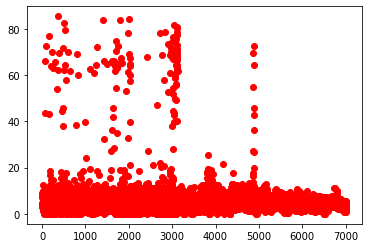

In [8]:
x = range(len(mat_d1_NotNan))
y = mat_d1_NotNan
plt.plot(x,y,'ro')

### Py_code - d1

In [9]:
VertexVoltageData_NotNan = VertexVoltageData[~np.isnan(VertexVoltageData)]
print(VertexVoltageData_NotNan.shape)
for item in VertexVoltageData_NotNan:
    print(item)

(7019,)
3.232098503183469
3.9829743118190435
8.13170863415816
4.527522805245149
8.71201963533663
8.952106749767786
7.710112479442464
7.123692403033107
4.316114521551
7.30368916602816
3.009170711423772
3.6550392942245167
4.434295119523993
7.360049899333147
3.4020112011367534
4.065263203819866
9.594367446451859
8.73413784618533
1.8770399603551886
8.587678744619621
4.003572042780228
2.9754473977451257
9.64231296728761
1.4236998849819102
9.193609300870731
9.440015613961924
6.094583580099802
9.855476518091798
6.793037616339427
8.291614899525026
7.495675345937024
12.636503054600746
6.430950877616825
6.254097820635148
4.108318902007495
3.8964057791142843
1.9722200733054276
1.7996647626343876
7.607553930947255
2.6973711480144407
2.1008091222589305
7.6464681239056835
8.143001551884053
2.1156424057551004
2.0484380417120307
6.993861875833923
2.0954716838173395
3.710049964267059
5.3824794343183076
3.9584632137122826
3.581312115492565
5.957260113090582
10.501623086253703
5.016037642728879
0.0
3.723

6.520866932127403
2.9292299441692524
4.626640792441456
2.54921717857893
4.3539705168809855
8.62873662585199
3.5143859944835567
7.112535344980921
4.276109981747937
3.276731918533352
2.946666935379631
3.0011167728795924
5.180607408779629
2.8416829186365105
2.7241145159700335
2.8354607493503097
2.6868557367515384
5.254976339991634
2.685470898705029
3.4459436132719445
5.300544780031896
4.239993858763373
9.271809112060396
3.1866744841714247
2.5325911896418467
6.938184512006112
3.7947688121055916
2.899790913326612
3.4325553957275083
2.610991996124551
3.565041411578906
3.474304915502578
3.163732641062125
3.052450709809978
4.19787288258174
4.872760372353181
3.163704077860957
2.3204976879017236
4.084069323490368
3.834692302551966
3.69950549814894
3.561522874643414
3.897431629245719
3.4836139126889316
4.085748449380809
2.4829958537591073
4.933341752492554
3.928642122325353
2.697627368702874
3.0723415222659214
2.8902732591023987
3.002093203350969
2.84116188938757
5.2815144212712495
1.860697209678

2.2355587273155964
5.663656329844973
4.622039900761258
2.5291694603834785
5.857579091569781
3.2353435205653898
6.237823330939021
2.1012389285104334
4.314620974310839
5.451575763408322
4.392908245201874
6.000725859662559
4.7302782510243455
4.9738042038402135
3.3398826861100246
3.317360129156937
0.9009451215096776
1.4986648758792063
1.2474506373339158
1.4954841462670663
1.0662228669713296
0.9914519413436169
3.1309639468626433
5.484742939347692
7.330419059300159
2.438103387592701
6.8750896403341
5.305887434312029
1.992652151439164
1.8387893967926943
2.389036173886884
1.6204101087752505
2.5863937383760214
2.554277713823595
2.0783341390453414
2.5058388224784887
5.3067993097055925
2.5300235535057354
2.0084509100648003
4.834168227061916
5.651056400270286
4.578941082014693
4.2846560062986745
1.8171441460159583
1.5522479866256877
2.356106096207997
1.9537476939169778
2.192182256701945
4.759607434850931
1.6222999560749058
1.8246945086151343
2.3105351904357803
1.5423523860151975
2.2559251126769135

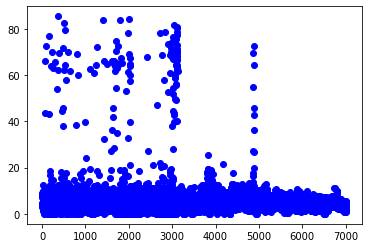

In [10]:
x = range(len(VertexVoltageData_NotNan))
y = VertexVoltageData_NotNan
plt.plot(x,y,'bo')

### SciPy - rbf

In [11]:
d1_py

print(d1_py.shape)

for item in d1_py:
    print(item)

(9279,)
3.565668088828488
10.145040348615112
4.653429553651222
10.31971022846983
11.408674677525369
8.859928817466084
6.2272398179877655
5.715229828988413
9.05288121248691
8.244546763849485
7.442034523922985
7.103984642521709
7.2267404397637165
13.034875869899565
11.673357010078917
3.7291413142099827
2.441637794303915
11.27335429342611
3.4330897314803224
13.240535995304867
3.431385485180499
3.98501944664406
6.752982336281889
4.283639621922703
6.365201120848724
5.220268115583053
8.471673517413365
7.683230774176991
2.9947489648702685
10.074514832003388
8.077920089360987
5.481081499484048
6.246278078654086
3.792440896674634
8.153981976924683
3.9022621201972925
10.580220694079571
8.494172308885481
7.349075275093583
5.912935035442274
7.816735030212612
8.44407371086595
6.459435214512268
12.00931532268487
7.891261202013084
14.814534562042013
6.045493378928313
6.115533743308788
6.562720727944225
6.38579314984122
7.95983316899401
6.968362874280274
6.269559437977023
7.365258730256983
10.15625064

7.163605122073932
6.338749925252841
2.038687361037546
3.242457685721547
6.193360457121628
11.839891462145488
11.667838095938919
4.965766430323583
6.0235069330697115
1.9377075674918842
8.089356536959713
6.985623449910463
3.6429447182632657
2.3009141711022494
9.006523451693283
13.03172277703834
5.453308082386002
4.642815651903675
16.130724535312083
2.4681374922188297
55.538196597865976
4.706416583842156
12.330080057164878
4.103528891570022
7.211042110920857
11.660338245749472
11.33079188839804
7.324326939720095
11.688490321646896
4.96502548311355
10.383566999215077
2.894771298260139
7.381958098594964
5.426795135584825
8.56960690539222
4.543844545344314
9.011009206144763
8.753473997454421
13.834826926771939
1.6356467442293479
5.936672363923435
2.326955113600775
2.142152234631169
5.204236191390692
7.646833693394001
3.6868040107999605
2.51864892137138
3.9905733495731965
6.822457631873704
4.765141271280754
8.421556117323462
6.031209038443421
4.486790887952452
6.589748687992824
3.553620849366

58.99905501228383
7.840398054186835
4.184086752635153
5.937353223685136
9.600845365436726
6.477915868332616
6.982158151991257
2.3803898617403547
6.5890056246172435
7.331955332699522
8.085390311381161
3.170172491189362
60.314468750191935
6.923811214915077
6.9294692900923
6.592167384056609
8.012464439739233
4.005065967215671
4.364600644475331
7.503463297940016
2.9563199638604942
5.920637706972684
2.8705578660647006
18.06517233702118
60.40089332996425
54.05477324084546
7.083709460172031
8.09156651580895
5.686566781294232
4.508342129319203
4.436096461864963
4.294419653315117
3.1630643952100854
4.265092211576075
8.300410096147857
5.685714803236124
3.655797863926864
46.77492932438835
6.357757791239237
5.644519913113015
4.046873993647523
6.425889577675775
3.2005339646849507
59.96691226294263
5.892848459423476
47.809563142924816
3.5895058498037997
10.8289693971725
3.484684597273656
7.233378688251605
5.786301947966479
15.727229783612984
2.04802619347538
7.617854238087716
4.443512399674546
14.48

4.863177237179002
5.248376503351778
5.767235292319015
4.624439873855522
5.172641594899346
5.362669431523727
5.196483008758264
7.84515615378325
8.16178367487737
8.006549945918664
6.744540671066034
5.35620365196371
4.038422258370474
10.281191009316217
5.13354660132245
7.522111071891231
10.30537553922693
3.799683371418041
5.2978092091279905
5.056611127627775
5.151244233408079
4.624886138231204
4.789652206171468
5.843539663899492
5.718012339844222
4.967150520905193
5.017256027059034
4.4572709769233825
9.092691410880889
5.2109957918403325
9.346161269355548
7.373881340204548
4.450917384634636
4.641418922231082
4.627475911187503
4.936985894242412
4.698623121770993
6.64383021410481
8.74585673301408
4.702884630022936
6.233945948026644
8.882567391125463
4.088656294653902
4.592851972172525
5.028215824715289
7.392230483235153
6.883228108969888
8.05203201980737
7.9013662844892
4.5747120760952384
3.941415399460425
4.290974274945711
4.307731804572427
4.8538312639105925
3.14621258077716
4.617546575268

3.479172663088775
3.504417841798613
3.9398093044794678
3.983955167068302
4.399911661579495
4.738127290811235
5.5759774743728485
5.857880751027551
5.458354700898099
5.37910654216671
5.337965221297054
5.461222811137532
3.6511311215679143
5.602753964549038
6.273459253688543
6.236810234010818
6.038789856005451
5.109389126590941
4.869991855033049
2.6823889673071335
4.215596722880946
4.6142385788775755
4.183673310322774
3.817672917959726
3.7649623090894693
3.9490658057534347
4.781096283491934
6.159223230270527
6.0815715069741145
5.965740881389138
5.46151880615389
5.433128497398002
3.939271966623437
3.2859884482527377
2.7800607881615633
3.0558823005344493
3.2702130209481766
3.464047574291044
3.4837662080255996
3.329132231095855
3.3357583576316756
3.4148447918792044
3.4658265500848984
3.6504957461852428
3.7487434173661995
4.173110755875314
4.291488457091987
5.181427638244941
5.405022924706941
5.4782632365894415
5.298771576168974
3.3740935659798197
2.477948236950624
3.409209403719842
4.63108756

range(0, 9279)


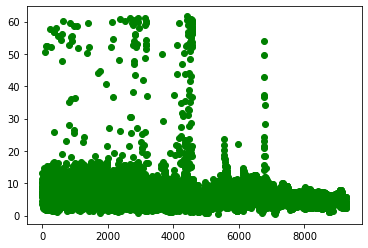

In [12]:
x = range(len(d1_py))
print(x)
y = d1_py
plt.plot(x,y,'go')


### difference between Mat d1 and Py d1

In [13]:
diff = np.subtract(VertexVoltageData_NotNan,mat_d1_NotNan)
print(np.absolute(diff).max())

0.0


### Trimesh Plot with FreeBoundary/Outline

In [14]:
import trimesh


# print(ep_case)
nodes = ep_case.nodes
# print(nodes)
indices = ep_case.indices
# print(indices)

mesh = trimesh.Trimesh(vertices=nodes,faces=indices)

freeBoundary = mesh.outline().to_dict()
inds = np.array(freeBoundary['entities'][0]['points'])


print(indices[inds])


# freeBoundary = ep_case_mesh.outline()
# # vertex_index = ep_case_mesh.outline().vertex_nodes()

# print(dir(freeBoundary))
# print(freeBoundary.vertex_nodes)


scene = trimesh.Scene([ep_case_mesh])
scene.show()

[[2761. 3497. 3515.]
 [7176. 3092. 7158.]
 [6488. 3940. 6536.]
 [2802. 4525. 4534.]
 [2775. 2887. 2515.]
 [6826. 6815.  287.]
 [5789. 1796. 4129.]
 [3665. 6806. 2348.]
 [6049. 6039. 1395.]
 [7998. 8549. 8557.]
 [7231.  749. 2332.]
 [2892. 6384. 5527.]
 [3283. 2703. 2658.]
 [8536. 8530. 1512.]
 [3653.  704. 3229.]
 [1145. 7405. 4568.]
 [6522. 6399. 3469.]
 [5911.  650. 6802.]
 [4530. 2808. 2344.]
 [6540. 4591. 6279.]
 [4951. 3201. 5166.]
 [6243. 6658. 6661.]
 [8326. 8322. 8331.]
 [6212.  230. 5513.]
 [7599. 4745. 7597.]
 [6656. 3550. 1138.]
 [5103. 5079. 3271.]
 [1763.  483. 7201.]
 [7377. 5819. 7375.]
 [3991. 2372. 4010.]
 [  80. 2714. 3101.]
 [8384. 8375. 8383.]
 [4801. 3470. 5047.]
 [6615. 6640. 4912.]
 [3014. 7110. 6746.]
 [8381. 8366. 3678.]
 [6410. 6405. 2704.]
 [2874. 4085. 3427.]
 [2395.  789. 6880.]
 [2897. 7228. 1334.]
 [ 962. 7192.  483.]
 [ 797. 4221. 4176.]
 [6956. 3878. 3638.]
 [ 133. 6601. 3378.]
 [ 921.  386. 1164.]
 [8395. 8391. 8383.]
 [7024.  118.  454.]
 [5891. 1424.